In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Spam\Spam_AG_10.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.0,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.0,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.0,0.223,0.0,0.000,0.000,0.000,3.000,15.0,54.0
4,0.00,0.00,0.00,0.0,NaN,NaN,0.00,0.00,NaN,0.64,...,0.0,0.0,NaN,NaN,NaN,0.054,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.348,0.0,1.160,0.000,0.000,3.121,15.0,103.0
4593,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.000,3.043,15.0,70.0
4594,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.136,0.0,0.000,0.000,0.409,1.837,12.0,68.0
4595,0.17,0.00,0.68,0.0,0.34,0.34,0.00,0.00,0.00,0.00,...,0.0,0.0,0.032,0.0,0.065,0.000,0.000,1.189,5.0,69.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	319
float64		column 2	87
float64		column 3	116
float64		column 4	174
float64		column 5	116
float64		column 6	290
float64		column 7	290
float64		column 8	290
float64		column 9	613
float64		column 10	290
float64		column 11	319
float64		column 12	174
float64		column 13	174
float64		column 14	261
float64		column 15	584
float64		column 16	261
float64		column 17	410
float64		column 18	435
float64		column 19	203
float64		column 20	410
float64		column 21	468
float64		column 22	290
float64		column 23	671
float64		column 24	613
float64		column 25	555
float64		column 26	816
float64		column 27	29
float64		column 28	729
float64		column 29	613
float64		column 30	758
float64		column 31	729
float64		column 32	816
float64		column 33	149
float64		column 34	932
float64		column 35	783
float64		column 36	903
float64		column 37	319
float64		column 38	145
float64		column 39	439
float64		column 40	874
float64		column 41	203
float64		column 42	551
float64

In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
count,4278.000000,4510.000000,4481.000000,4423.000000,4481.000000,4307.000000,4307.000000,4307.000000,3984.000000,4307.000000,...,4390.000000,3955.000000,4013.000000,4104.000000,4129.000000,3901.000000,3872.000000,3752.000000,4104.000000,3810.000000
mean,0.102931,0.214858,0.281437,0.068058,0.311636,0.096638,0.112661,0.108143,0.084792,0.243562,...,0.031665,0.038758,0.137960,0.017553,0.271906,0.076046,0.045109,5.035833,50.144493,281.172966
std,0.291872,1.301302,0.503617,1.422891,0.667437,0.278317,0.385652,0.411161,0.260668,0.654888,...,0.282409,0.244420,0.232908,0.114319,0.843727,0.249669,0.451518,31.020666,129.203436,589.957276
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.616500,6.000000,36.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.303500,15.000000,96.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.170000,...,0.000000,0.000000,0.188000,0.000000,0.318000,0.054000,0.000000,3.780500,43.000000,269.500000
max,4.340000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,3.330000,18.180000,...,10.000000,4.385000,5.277000,4.081000,32.478000,6.003000,19.829000,1102.500000,2204.000000,15841.000000


<AxesSubplot:>

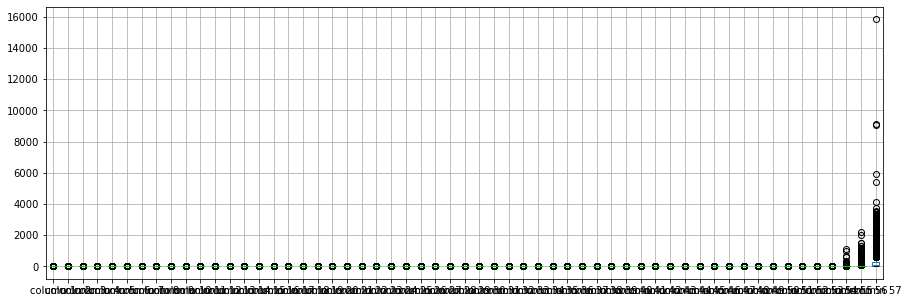

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.102931
column 2       0.214858
column 3       0.281437
column 4       0.068058
column 5       0.311636
column 6       0.096638
column 7       0.112661
column 8       0.108143
column 9       0.084792
column 10      0.243562
column 11      0.060479
column 12      0.543803
column 13      0.094027
column 14      0.058376
column 15      0.048811
column 16      0.245969
column 17      0.140855
column 18      0.183025
column 19      1.670039
column 20      0.088505
column 21      0.818922
column 22      0.124497
column 23      0.104328
column 24      0.089817
column 25      0.554861
column 26      0.259101
column 27      0.764100
column 28      0.122859
column 29      0.099681
column 30      0.101503
column 31      0.064959
column 32      0.045747
column 33      0.096014
column 34      0.046377
column 35      0.106411
column 36      0.094683
column 37      0.136064
column 38      0.013306
column 39      0.081265
column 40      0.063658
column 41      0.044238
column 42      0

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
column 1,1.000000,-0.027918,0.066761,0.015272,0.017650,0.075281,-0.000786,-0.002623,0.095547,0.043720,...,-0.024177,-0.026395,-0.023565,-0.033216,0.043097,0.122242,-0.010189,0.037313,0.095188,0.092202
column 2,-0.027918,1.000000,-0.033563,-0.006629,-0.023684,-0.025506,0.000793,-0.016068,-0.003520,0.032709,...,-0.015482,-0.007679,-0.057748,-0.018785,-0.018403,-0.014037,0.004014,0.005851,0.004113,-0.024173
column 3,0.066761,-0.033563,1.000000,-0.021439,0.079048,0.088496,0.036044,0.008127,0.087904,0.025064,...,-0.024585,-0.032109,-0.012125,-0.035130,0.096579,0.087098,-0.000030,0.076629,0.164046,0.068361
column 4,0.015272,-0.006629,-0.021439,1.000000,0.003555,-0.010658,0.015490,0.012822,-0.002798,-0.005418,...,-0.001880,-0.003128,-0.014623,-0.006954,-0.004466,0.012460,0.001084,0.005516,0.035767,0.025622
column 5,0.017650,-0.023684,0.079048,0.003555,1.000000,0.053537,0.159130,0.026642,0.022247,0.031239,...,-0.031632,-0.036706,-0.055573,-0.025842,0.025331,0.041081,0.003983,0.047559,0.090106,-0.000120
column 6,0.075281,-0.025506,0.088496,-0.010658,0.053537,1.000000,0.050242,0.082497,0.120237,0.009162,...,-0.031568,-0.019865,-0.011141,-0.014200,0.068077,0.102367,0.021378,-0.008738,0.144784,0.087128
column 7,-0.000786,0.000793,0.036044,0.015490,0.159130,0.050242,1.000000,0.040221,0.047527,0.050359,...,-0.031528,-0.033292,-0.060786,-0.028369,0.053732,0.079175,0.055537,0.042099,0.090896,-0.007927
column 8,-0.002623,-0.016068,0.008127,0.012822,0.026642,0.082497,0.040221,1.000000,0.108308,0.075290,...,-0.021199,-0.026526,-0.037171,-0.018708,0.019689,0.055887,-0.008361,0.010667,0.055931,0.034150
column 9,0.095547,-0.003520,0.087904,-0.002798,0.022247,0.120237,0.047527,0.108308,1.000000,0.125468,...,-0.029293,-0.013433,-0.028038,0.011979,0.037803,0.152958,-0.001673,0.098943,0.298400,0.261309
column 10,0.043720,0.032709,0.025064,-0.005418,0.031239,0.009162,0.050359,0.075290,0.125468,1.000000,...,-0.015587,0.012149,0.011174,0.007759,0.025912,0.067336,0.036657,0.060704,0.145535,0.091548


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+20,17+20+20,17+20+20+20,17+20+20,17+20,17], vae_layer = False, seed = 200)
imputer.build_model(df)
imputer.train_model(training_epochs=10)


Size index: [57]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 547.874616616279
Epoch: 1 , loss: 554.7825005295384
Epoch: 2 , loss: 550.3557806247618
Epoch: 3 , loss: 546.1308984789699
Epoch: 4 , loss: 548.0109716541675
Epoch: 5 , loss: 548.5715006120529
Epoch: 6 , loss: 554.1567813195418
Epoch: 7 , loss: 545.7073671560254
Epoch: 8 , loss: 545.9480273682066
Epoch: 9 , loss: 546.2929579571979
Training complete. Saving file...
Model saved in file: tmp/MIDAS


In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(4597, 57)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      0.000
column 2      0.000
column 3      0.000
column 4      0.000
column 5      0.000
column 6      0.000
column 7      0.000
column 8      0.000
column 9      0.000
column 10     0.000
column 11     0.000
column 12     0.000
column 13     0.000
column 14     0.000
column 15     0.000
column 16     0.000
column 17     0.000
column 18     0.000
column 19     0.000
column 20     0.000
column 21     0.000
column 22     0.000
column 23     0.000
column 24     0.000
column 25     0.000
column 26     0.000
column 27     0.000
column 28     0.000
column 29     0.000
column 30     0.000
column 31     0.000
column 32     0.000
column 33     0.000
column 34     0.000
column 35     0.000
column 36     0.000
column 37     0.000
column 38     0.000
column 39     0.000
column 40     0.000
column 41     0.000
column 42     0.000
column 43     0.000
column 44     0.000
column 45     1.440
column 46     0.000
column 47     0.000
column 48     0.000
column 49     0.000
column 50     0.196


In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Spam.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
4,0.0,0.0,0.0,0.0,-1.653592,0.049822,0.0,0.0,0.032445,0.0,...,0.0,0.0,0.123884,0.003725,0.088718,0.0,0.023345,1.422873,0.0,-108.292488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
4593,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
4594,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
4595,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

23258.382954307344

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

47458.653692284744

In [18]:
NRMS=numerator/denominator
NRMS


0.490076754075483

In [19]:
new_df.iloc[66,:]

column 1       0.000
column 2       0.440
column 3       0.890
column 4       0.000
column 5       0.440
column 6       0.000
column 7       0.000
column 8       0.000
column 9       0.000
column 10      0.000
column 11      0.000
column 12      0.440
column 13      0.000
column 14      0.000
column 15      0.000
column 16      0.440
column 17      0.000
column 18      0.890
column 19      2.240
column 20      0.000
column 21      1.340
column 22      0.000
column 23      0.000
column 24      0.000
column 25      0.000
column 26      0.000
column 27      0.000
column 28      0.000
column 29      0.000
column 30      0.000
column 31      0.000
column 32      0.000
column 33      0.000
column 34      0.000
column 35      0.000
column 36      0.000
column 37      0.000
column 38      0.000
column 39      0.000
column 40      0.000
column 41      0.000
column 42      0.000
column 43      0.000
column 44      0.000
column 45      0.440
column 46      0.000
column 47      0.000
column 48    

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64,0.0,0.320000,0.000000,0.00,0.00,0.000000,0.00,...,0.0,0.0,0.000000,0.000000,0.778000,0.000,0.000000,3.756000,61.0,278.000000
1,0.21,0.28,0.50,0.0,0.140000,0.280000,0.21,0.07,0.000000,0.94,...,0.0,0.0,0.132000,0.000000,0.372000,0.180,0.048000,5.114000,101.0,1028.000000
2,0.00,0.00,0.00,0.0,0.630000,0.000000,0.31,0.63,0.310000,0.63,...,0.0,0.0,0.135000,0.000000,0.135000,0.000,0.000000,3.537000,40.0,191.000000
3,0.00,0.00,0.00,0.0,1.850000,0.000000,0.00,1.85,0.000000,0.00,...,0.0,0.0,0.223000,0.000000,0.000000,0.000,0.000000,3.000000,15.0,54.000000
4,0.00,0.00,0.00,0.0,0.266408,0.049822,0.00,0.00,0.032445,0.64,...,0.0,0.0,0.177884,0.003725,0.252718,0.054,0.023345,3.093873,4.0,3.707512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,0.0,0.000000,0.000000,0.00,0.00,0.000000,0.00,...,0.0,0.0,0.348000,0.000000,1.160000,0.000,0.000000,3.121000,15.0,103.000000
4593,0.00,0.00,0.00,0.0,0.000000,0.000000,0.00,0.00,0.000000,0.00,...,0.0,0.0,0.000000,0.000000,0.000000,0.000,0.000000,3.043000,15.0,70.000000
4594,0.00,0.00,0.00,0.0,0.000000,0.000000,0.00,0.00,0.000000,0.00,...,0.0,0.0,0.136000,0.000000,0.000000,0.000,0.409000,1.837000,12.0,68.000000
4595,0.17,0.00,0.68,0.0,0.340000,0.340000,0.00,0.00,0.000000,0.00,...,0.0,0.0,0.032000,0.000000,0.065000,0.000,0.000000,1.189000,5.0,69.000000


In [21]:
imputations[-1].to_excel("Spam_AE_10(imp).xlsx", index=False, header=False)